In [1]:
import glob
import math
import numpy as np
import matplotlib.pyplot as pyplot

from utils import *
from imageio import imread, imsave

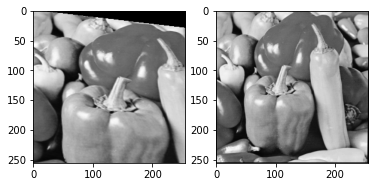

In [5]:
input0 = rgb2gray(imread("input_0.png"))
input1 = rgb2gray(imread("input_1.png"))

fix, ax = plt.subplots(1, 2)

ax[0].imshow(input0, cmap="gray")
ax[1].imshow(input1, cmap="gray")

In [7]:
i0_gx, i0_gy = compute_gradients(input0)
i1_gx, i1_gy = compute_gradients(input1)

height, width = input0.shape

J_mat = np.zeros((width, height, 2, 8))
p = np.zeros((8))
for x in range(width):
    for y in range(height):
        J_mat[y, x] = jacobian(x, y, p)

In [15]:
imgtest = imread("/home/mike/Git/inverse_compositional_algorithm/input_0_gray.png")

print(imgtest)
print(input0)

imsave("/home/mike/Git/inverse_compositional_algorithm/input_0_gray.png", input0)

imsave("/home/mike/Git/inverse_compositional_algorithm/input_1_gray.png", input1)

Lossy conversion from float64 to uint8. Range [0.0, 220.2446]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 223.28730000000002]. Convert image to uint8 prior to saving to suppress this warning.
[[151 175 198 ...   0   0   0]
 [151 183 200 ...   0   0   0]
 [145 187 201 ...   0   0   0]
 ...
 [ 38  31  27 ... 184 186 189]
 [ 28  26  26 ... 185 186 189]
 [ 40  41  44 ... 185 186 186]]
[[130.7883 151.2286 170.9202 ...   0.       0.       0.    ]
 [130.0873 157.8428 173.1327 ...   0.       0.       0.    ]
 [125.1417 161.6745 173.4208 ...   0.       0.       0.    ]
 ...
 [ 32.4489  26.9548  23.3465 ... 158.6475 160.8322 162.9029]
 [ 24.482   22.7595  22.5746 ... 159.4194 160.7182 163.191 ]
 [ 34.5412  35.8292  38.1279 ... 160.1204 161.0772 160.6751]]


In [10]:
steepest_descent = steepest_descent_image(i0_gx, i0_gy, J_mat)
H = hessian(steepest_descent)

print(H.shape)
print(steepest_descent.shape)

(8, 8)
(256, 256, 8)


In [11]:
homography = params_to_mat(p)
iteration, error = (0, np.inf)

while error > 0 and iteration < 100:
    iteration += 1

    warp_image, output = rectification(input1, homography)
    difference = np.abs(input0 - output)
    b = np.zeros(8)

    for x in range(input0.shape[0]):
        for y in range(input0.shape[1]):
            x_idx = x + PADDING
            y_idx = y + PADDING
            b += stdescent[x_idx, y_idx]*difference[x, y]

    deltaP = H_inv @ b
    deltaP_inv = invr_warp(deltaP)

    p = incr_warp(p, deltaP_inv)

    homography_inv = np.linalg.inv(params_to_mat(deltaP))
    homography = params_to_mat(p)

    homography = homography @ homography_inv

    # calculate error
    error = math.sqrt(sum(deltaP ** 2))
    print(error)

ValueError: operands could not be broadcast together with shapes (256,256) (20,20) 

In [23]:
du = np.array([[126517763257.500000,
        92698544617.250000,
        775242775.000000,
        -36822077378.000000,
        -13111117617.000000,
        -183567372.500000,
        -21094419860586.000000,
        -13569548532746.750000],
    [92698544617.250000,
        120085308209.500000,
        770781294.500000,
        -13111117617.000000,
        -9062541250.250000,
        -75175347.250000,
        -13569548532746.750000,
        -12951558849646.500000],
    [775242775.000000,
        770781294.500000,
        6573448.000000,
        -183567372.500000,
        -75175347.250000,
        -1263785.250000,
        -113406645640.500000,
        -83636003367.000000],
    [-36822077378.000000,
        -13111117617.000000,
        -183567372.500000,
        205664437541.000000,
        74207053951.500000,
        1218955778.000000,
        -3883381198951.500000,
        -5976360191160.500000],
    [-13111117617.000000,
        -9062541250.250000,
        -75175347.250000,
        74207053951.500000,
        78842171713.250000,
        613700087.250000,
        -5976360191160.500000,
        -11000928796835.250000],
    [-183567372.500000,
        -75175347.250000,
        -1263785.250000,
        1218955778.000000,
        613700087.250000,
        9466323.500000,
        -37384976573.500000,
        -65731054096.250000],
    [-21094419860586.000000,
        -13569548532746.750000,
        -113406645640.500000,
        -3883381198951.500000,
        -5976360191160.500000,
        -37384976573.500000,
        4913854581412639.000000,
        3516133951022653.000000],
    [-13569548532746.750000,
        -12951558849646.500000,
        -83636003367.000000,
        -5976360191160.500000,
        -11000928796835.250000,
        -65731054096.250000,
        3516133951022653.000000,
        4114767091597891.000000]])


# np.save("hessian.npy", du)

print(du.T == du)

[[ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True]]
